<h1>Práctica de Fundamentos de Data Science</h1>
<p/>
<table border>
<tr><td>Alumno</td><td>email</td><td>Teléfono</td></ur>
<tr><td>José María Álvarez</td><td>josemaria.alvarezfernandez@elcorteingles.es</td><td>+34 647 471 225</td></ur>
<tr><td>Adolfo González</td><td>adolfo.gonzalez@elcorteingles.es</td><td>+34 673 333 347</td></ur>
<tr><td>César Colado</td><td>cesar.colado@elcorteingles.es</td><td>+34 661 415 555</td></ur>
</table>

<h1>Días de venta especial en un 'retailer'</h1>
<p/>
En un retailer como <b1>El Corte Inglés</b1>, llamamos días de venta especial a períodos como la camapaña navideña, la Semana Santa, un Black Friday, Las Rebajas de Enero, etc.
<p/>
Durante estos períodos la venta suele múltiplicarse, pero no es siempre lineal y la tendencia no siempre es fácil de predecir. Son muchas las incógnitas que debemos resolver para poder estimar el 'stock' del que se debe hacer provisión en la tienda, el número de empleados que debemos tener en cada departamento en los días de más afluencia de clientes, número de servidores o ancho de banda que debemos tener preparados para resolver toda la demanda online, etc.
<p/>
Como es de nuestro interés, hemos seleccionado un conjunto de datos de una empresa de retail 'un poco' mayor que El Corte Inglés, con origen en Estados Unidos y que se enfrenta a problemas similares.

<img src='http://media.graytvinc.com/images/810*455/WRM+Walmart+WEB.jpg' alt='Walmart' height='400' width='4000'>


Walmart es un 'retailer' con origen en Estados Unidos que emplea a más de dos millones de empleados. Como El Corte Inglés, se enfrenta a un desafío en cada período de venta especial para dimensionar sus recursos de forma eficiente.

<img src="https://boygeniusreport.files.wordpress.com/2015/11/black-friday-shoppers1.jpg?quality=98&strip=all"
alt="Recursos mal estimados en Walmart"/>

Hemos conseguido un conjunto de datos de Walmart que trataremos de utilizar para hacer un análisis de las necesidades de este "retailer" en periódos de venta especial.</p>
<a target="_blank" href="https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting">Datos de Walmart</a>

¿Cómo abordar este problema de negocio? La propuesta es aprender de los datos, mediante minería de datos y descubrimiento de conocimiento, para lo que aplicaremos la metodología estándar de facto: 
<p>CRISP-DM</p> ("Cross Industry Standard Process for Data Mining")<p/>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/1024px-CRISP-DM_Process_Diagram.png" alt="diagrama explicativo de CRISP-DM" height="400" width="400"/><p/>
Esta metodología iterativa, diferencia seis fases en cada ciclo, a saber:<p/>
<li>Comprensión del negocio</li>
<li>Comprensión de datos</li>
<li>Preparación de datos</li>
<li>Modelado</li>
<li>Evaluación</li>
<li>Despliegue</li>


<h1>Fase I. Comprensión del negocio</h1>
//FIXME.ccolado Relacionar con la primera parte y la comprensión de los datos de la fase II

El objetivo es tratar de ser capaces de tener una previsión de ventas para poder hacer el acopio de recursos que necesitamos por tienda y departamento.


<h1>Fase II. Comprensión de los datos</h1>

Tenemos datos de 45 tiendas localizadas en diferentes zonas geográficas. En cada tienda tenemos unos departamentos concretos. Además, tendremos en cuenta ciertas acciones promocionales que Walmart lleva a cabo a lo largo del año. En Estados Unidos las principales periodos promocionales son:
<ol>
<li>Super Bowl. Como aquí la final de la Copa del Rey</li>
<li>El día del trabajo</li>
<li>Acción de Gracias. Es cuando comen el pavo y se juntan en familia</li>
<li>Navidad. Pues eso, Navidad</li>
</ol>
<p/>
Las semanas que incluyen estos períodos se les da un peso cinco veces mayor que al resto.
<p/>
Tenemos cuatro ficheros de datos:
<ol type=A>
<li>stores.csv - Información anónima sobre 45 tiendas, con tipo y tamaño de la tienda</li>
<li>train.csv - Datos históricos que cubren desde el 05/02/2010 hasta el 01/11/2012. Estos datos incluyen la tienda, el departamento, la semana de venta y la venta de esa semana. Además, también se incluye una marca que nos indica si era o no una semana festiva.</li>
<li>features.csv - Datos adicionales relativos a la tienda, con información como la temperatura, el precio de la gasolina, el precio de índice al consumo y la tasa de desempleo por semana.</li>
</ol>

Para poder acceder a los datos de forma sencilla, hemos subido los ficheros que nos facilita Kaggle a un proyecto de GitHub. 

El proyecto lo puedes encontrar en el siguiente enlace: https://github.com/ccolado/master-big-data-walmart
El objetivo es que sea sencillo acceder a los ficheros planos con los datos en formato raw, que encontrarás en los siguientes enlaces:

<table class="egt">
  <tr>
    <td>stores.csv</td><td>https://raw.githubusercontent.com/ccolado/master-big-data-walmart/master/walmart-data/stores.csv</td>
  </tr>
  <tr>
    <td>train.csv</td><td>https://raw.githubusercontent.com/ccolado/master-big-data-walmart/master/walmart-data/train.csv</td>
  </tr>
  <tr>
    <td>features.csv</td><td>https://raw.githubusercontent.com/ccolado/master-big-data-walmart/master/walmart-data/features.csv</td>
  </tr>
</table>

<h1>Fase III. Preparación de datos</h1>

Comenzaremos por el primer fichero, los datos maestros de tienda. Lo cargaremos desde el proyecto de GitHUb donde no es necesario autenticarse para cargarlo y revisaremos los datos que tenemos. 

Recuerda que tenemos datos de 45 tiendas y que en este fichero tenemos el tipo de tienda y un número que nos da una idea del tamaño de la tienda. El fichero tiene cabeceras y es un CSV (Comma Separated Values), por lo que indicaremos eso al cargar el fichero en nuestro dataFrame:

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/ccolado/master-big-data-walmart/master/walmart-data/stores.csv"
stores = pd.read_table(url,sep=',')
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


Entre los datos de tienda no parece haber ninguno vacío, pero comprobaremos cuántas tiendas diferentes hemos cargado para estar seguros de que tenemos las 45.

In [2]:
stores.Store.count()

45

Revisemos que no tenemos información repetida de tiendas:

In [3]:
len(stores.Store.unique())

45

¡Genial! Tenemos 45 tiendas. Dado que están anonimizadas, no tienemos información de por ejemplo la tienda "Castellana" o "Diagonal". Las tiendas se identifican con un número: tienda 1, tienda 2, ... tienda 45. El índice que nos ha aplicado la función de carga es estándar en python, comienza en 0 y termina en 44. <p/>
Nos va a resultar mucho más sencillo para referirnos a una tienda indexar por su número de tienda, es decir, indexar por tienda 1 para saber el tamaño o su tipo. Por este motivo modificaremos el índice para colocar el número de tienda como índice en nuestro df: stores

In [4]:
stores.index = stores.Store
stores.head(3)

,Store,Type,Size
Store,,,
1,1,A,151315
2,2,A,202307
3,3,B,37392


El tamaño que nos han dado es en pies cuadrados y para hacernos mejor idea, e interpretar los datos mucho mejor, lo pasaremos a metros cuadrados:

In [5]:
stores.Size = stores.Size * 0.092903
stores.head(3)

,Store,Type,Size
Store,,,
1,1,A,14057.617445
2,2,A,18794.927221
3,3,B,3473.828976


Por curiosidad, averigüemos el tamaño medio de nuestras tiendas:

In [6]:
stores.Size.mean()

12104.108902799995

La media de las muestras que tenemos es de 12.104 metros cuadrados. Y tenemos tiendas de tipo A, tipo B y tipo C

In [7]:
stores.Type.describe()

count     45
unique     3
top        A
freq      22
Name: Type, dtype: object

¿Cuántas tiendas tenemos de tipo A? ¿cuántas de tipo B? ¿cuántas de tipo C?

In [8]:
grouped = stores[['Type','Store']].groupby('Type').count()
grouped

,Store
Type,
A,22
B,17
C,6


Para poder hacer algunas agrupaciones, vamos también a crear un objeto dataFrame utilizando un multi-índice. Para ello construiremos el índice con el tipo de tienda y el número de tienda y le llamaremos "stores_by_type".

In [11]:
stores = stores.sort_values(['Type','Store'], ascending=True)
stores

,Store,Type,Size
Store,,,
1,1,A,14057.617445
2,2,A,18794.927221
4,4,A,19125.290289
6,6,A,18813.322015
8,8,A,14407.211434
11,11,A,19277.279597
13,13,A,20403.542666
14,14,A,18664.026894
19,19,A,18935.396557


In [12]:
multi_index = pd.MultiIndex.from_arrays([stores.Type,stores.Store],names=['Type','Store'])
stores_by_type = stores.Size
stores_by_type.index=multi_index
stores_by_type

Type  Store
A     1        14057.617445
      2        18794.927221
      4        19125.290289
      6        18813.322015
      8        14407.211434
      11       19277.279597
      13       20403.542666
      14       18664.026894
      19       18935.396557
      20       18928.243026
      24       18935.396557
      26       14168.915239
      27       18969.306152
      28       19166.074706
      31       18928.986250
      32       18859.959321
      33        3687.320070
      34       14689.264942
      36        3707.758730
      39       17104.278427
      40       14407.675949
      41       18238.809863
B     3         3473.828976
      5         3239.992125
      7         6569.449839
      9        11690.263199
      10       11753.344336
      12       10427.246914
      15       11495.538511
      16        5313.772891
      17        8657.444764
      18       11209.025659
      21       13021.934801
      22       11107.203971
      23       10640.459299
      25

In [13]:
stores_by_type['A'].describe()

count       22.000000
mean     16466.845607
std       4588.722678
min       3687.320070
25%      14478.073197
50%      18804.124618
75%      18935.396557
max      20403.542666
Name: Size, dtype: float64

In [14]:
stores_by_type['B'].describe()

count       17.000000
mean      9400.920149
std       3007.375826
min       3239.992125
25%       8657.444764
50%      10640.459299
75%      11495.538511
max      13021.934801
Name: Size, dtype: float64

In [15]:
stores_by_type['C'].describe()

count       6.000000
mean     3766.442458
std       121.158986
min      3687.320070
25%      3692.429735
50%      3707.758730
75%      3788.026922
max      3993.714164
Name: Size, dtype: float64

Ahora deberíamos hacer lo mismo con los datos que se identifican en el fichero <b>train.csv</b>. Este fichero contiene los datos de las ventas por departamento y tienda por semanas, sabiéndose además si cada semana es un período vacacional o no.


In [16]:
url = "https://raw.githubusercontent.com/ccolado/master-big-data-walmart/master/walmart-data/train.csv"
walmart_data = pd.read_table(url,sep=',')
walmart_data.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False


Haciendo una rápida inspección, podemos ver que no hay datos repetidos de venta en la tupla Tienda, Departamento y Fecha.

In [17]:
walmart_data[walmart_data.duplicated(subset=["Store", "Dept", "Date"], keep=False)]

,Store,Dept,Date,Weekly_Sales,IsHoliday


Sin embargo, tenemos tiendas que tienen ventas negativas. Podrían tratarse de días en los que hay más abonos que ventas, pero entenderemos que las ventas negativas no son posibles, con lo cual esas filas no las vamos a considerar.

In [18]:
walmart_data.sort_values(by='Weekly_Sales').head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
267730,28,6,2010-10-08,-4988.94,False
336495,35,47,2011-09-02,-3924.00,False
417801,45,47,2010-02-26,-1750.00,False


In [19]:
clean_walmart_data = walmart_data[walmart_data.Weekly_Sales >= 0]
clean_walmart_data.sort_values(by='Weekly_Sales').head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
262790,27,47,2012-08-24,0.0,False
394727,42,44,2012-10-05,0.0,False
25448,3,36,2012-08-17,0.0,False


Si sacamos el número de semanas que tenemos en el dataset, podríamos echar un primer vistazo a cuales son el top 10 de tiendas que más venden dentro de Walmart de forma semanal de media, en millones de dolares.

In [20]:
number_of_weeks = len(clean_walmart_data.Date.unique())
top_ten = (clean_walmart_data[["Store", "Weekly_Sales"]].groupby(["Store"]).sum()/number_of_weeks).sort_values(by='Weekly_Sales', ascending=False).head(10)
top_ten['Weekly_Sales_InMillions']='$' + (round(top_ten['Weekly_Sales']/1000000, 2)).astype(str) + 'M'
top_ten.Weekly_Sales_InMillions

Store
20    $2.11M
4     $2.09M
14    $2.02M
13     $2.0M
2     $1.93M
10     $1.9M
27    $1.78M
6     $1.56M
1     $1.56M
39    $1.45M
Name: Weekly_Sales_InMillions, dtype: object

Tambien podríamos ver cuales son los departamentos que más venden globalmente dentro de Walmart, por semana.

In [21]:
top_ten_dept = (clean_walmart_data[["Dept", "Weekly_Sales"]].groupby(["Dept"]).sum()/number_of_weeks).sort_values(by='Weekly_Sales', ascending=False).head(10)
top_ten_dept['Weekly_Sales_InMillions']='$' + (round(top_ten_dept['Weekly_Sales']/1000000, 2)).astype(str) + 'M'
top_ten_dept.Weekly_Sales_InMillions

Dept
92    $3.38M
95    $3.14M
38    $2.75M
72    $2.14M
90    $2.04M
40    $2.02M
2     $1.96M
91    $1.52M
13    $1.38M
8     $1.36M
Name: Weekly_Sales_InMillions, dtype: object

Ahora vamos a intentar un análisis exploratorio algo más complejo. Vamos a pintar las ventas de las 5 tiendas que más venden, que obtuvimos anteriormente, agrupadas por mes. Para ello, vamos a hacer varios pasos:
<ul>
  <li>Añadiremos una columna con la fecha formateada en formato fecha, y no en un string como está ahora</li>
  <li>Agrupamos por tienda y por fecha, y sumamos las ventas</li>
  <li>Después preparamos un gráfico donde creamos 5 lineas diferentes para cada una de las tiendas mencionadas y pintamos su linea, dandole un color diferente, y rotando la fecha para que se vea bien</li>
  <li>Hay que fijarse que a nuestro dataset le hemos pasado la función "resample", que nos permite, por cada una de las tiendas analizadas, poner los datos en el formato que queremos (mensual) y sumar las cantidades que esten en fechas del mismo mes.
</ul>


/home/jmalvarezf/Programas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


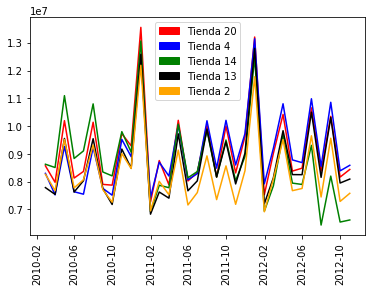

In [22]:
clean_walmart_data["Date_Formatted"] = pd.to_datetime(clean_walmart_data.Date, format='%Y-%m-%d')
sales_by_store_and_date = clean_walmart_data[["Store", "Date_Formatted", "Weekly_Sales"]].groupby(["Store", "Date_Formatted"]).sum()
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Tienda 20')
blue_patch = mpatches.Patch(color='blue', label='Tienda 4')
green_patch = mpatches.Patch(color='green', label='Tienda 14')
black_patch = mpatches.Patch(color='black', label='Tienda 13')
orange_patch = mpatches.Patch(color='orange', label='Tienda 2')
store20 = plt.plot(sales_by_store_and_date.loc[20].resample('M').sum(), color="red")
store4 = plt.plot(sales_by_store_and_date.loc[4].resample('M').sum(), color="blue")
store14 = plt.plot(sales_by_store_and_date.loc[14].resample('M').sum(), color="green")
store13 = plt.plot(sales_by_store_and_date.loc[13].resample('M').sum(), color="black")
store2 = plt.plot(sales_by_store_and_date.loc[2].resample('M').sum(), color="orange")
_= plt.legend(handles=[red_patch, blue_patch, green_patch, black_patch, orange_patch])
_= plt.xticks(rotation=90)


Como podemos ver, las ventas se intensifican muchísimo en Navidad, algo ya esperado, pero también existen otros picos de ventas diferentes. Podríamos hacer un análisis similar con los departamentos para ver si obtenemos algún resultado reseñable.

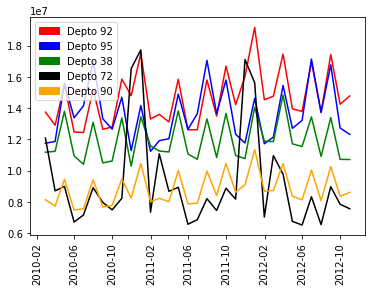

In [24]:
sales_by_dpto_and_date = clean_walmart_data[["Dept", "Date_Formatted", "Weekly_Sales"]].groupby(["Dept", "Date_Formatted"]).sum()
%matplotlib inline
red_dpto_patch = mpatches.Patch(color='red', label='Depto 92')
blue_dpto_patch = mpatches.Patch(color='blue', label='Depto 95')
green_dpto_patch = mpatches.Patch(color='green', label='Depto 38')
black_dpto_patch = mpatches.Patch(color='black', label='Depto 72')
orange_dpto_patch = mpatches.Patch(color='orange', label='Depto 90')
dpto92 = plt.plot(sales_by_dpto_and_date.loc[92].resample('M').sum(), color="red")
dpto95 = plt.plot(sales_by_dpto_and_date.loc[95].resample('M').sum(), color="blue")
dpto38 = plt.plot(sales_by_dpto_and_date.loc[38].resample('M').sum(), color="green")
dpto72 = plt.plot(sales_by_dpto_and_date.loc[72].resample('M').sum(), color="black")
dpto90 = plt.plot(sales_by_dpto_and_date.loc[90].resample('M').sum(), color="orange")
_= plt.legend(handles=[red_dpto_patch, blue_dpto_patch, green_dpto_patch, black_dpto_patch, orange_dpto_patch])
_= plt.xticks(rotation=90)

Y como podemos ver, el departamento 72 tiene unas ventas increiblemente grandes en Navidades en comparación con el resto del año, con lo que debe tener algo que ver con la Navidad.

Por último cargaremos el tercer fichero

In [25]:
import pandas as pd
url = "https://raw.githubusercontent.com/ccolado/master-big-data-walmart/master/walmart-data/features.csv"
features = pd.read_table(url,sep=',',parse_dates=True)
features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [26]:
dia_x=pd.Timestamp('2010-03-15')
dia_x
features['Date'][0]>features['Date'][1]

False

In [27]:
walmart_data.count()

Store           421570
Dept            421570
Date            421570
Weekly_Sales    421570
IsHoliday       421570
dtype: int64

In [28]:
features.count()

Store           8190
Date            8190
Temperature     8190
Fuel_Price      8190
MarkDown1       4032
MarkDown2       2921
MarkDown3       3613
MarkDown4       3464
MarkDown5       4050
CPI             7605
Unemployment    7605
IsHoliday       8190
dtype: int64

Para intentar sacar algun dato interesante, vamos a hacer un "merge" donde vamos a poner en cada una de las filas las columnas correspondientes al fichero de "features", para poder sacar datos en función de la temperatura del dia, o los precios del petróleo, etc. Además, comprobamos que el número de filas resultante es el total que teniamos antes en el dataset de walmart.

In [29]:
dataset_merged = pd.merge(walmart_data, features, on=["Store", "Date", "IsHoliday"])
dataset_merged.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [30]:
dataset_merged.count()

Store           421570
Dept            421570
Date            421570
Weekly_Sales    421570
IsHoliday       421570
Temperature     421570
Fuel_Price      421570
MarkDown1       150681
MarkDown2       111248
MarkDown3       137091
MarkDown4       134967
MarkDown5       151432
CPI             421570
Unemployment    421570
dtype: int64

In [31]:
clean_walmart_dataset = dataset_merged[dataset_merged.Weekly_Sales >= 0]
clean_walmart_dataset.sort_values(by='Weekly_Sales', ascending=False).head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
90645,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003
337053,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745
94393,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874


/home/jmalvarezf/Programas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


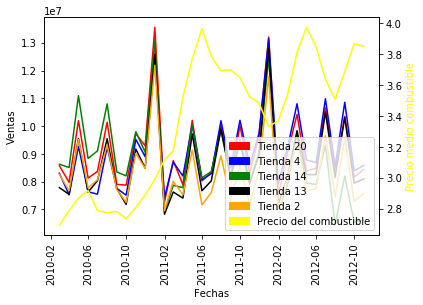

In [36]:
clean_walmart_dataset["Date_Formatted"] = pd.to_datetime(clean_walmart_dataset.Date, format='%Y-%m-%d')
sales_complete_by_store_and_date = clean_walmart_dataset[["Store", "Date_Formatted", "Weekly_Sales"]].groupby(["Store", "Date_Formatted"]).sum()
mean_fuelprice_by_date = clean_walmart_dataset[["Date_Formatted", "Fuel_Price"]].groupby(["Date_Formatted"]).mean()
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
fig, ax1 = plt.subplots()
_= plt.xticks(rotation=90)
red_patch = mpatches.Patch(color='red', label='Tienda 20')
blue_patch = mpatches.Patch(color='blue', label='Tienda 4')
green_patch = mpatches.Patch(color='green', label='Tienda 14')
black_patch = mpatches.Patch(color='black', label='Tienda 13')
orange_patch = mpatches.Patch(color='orange', label='Tienda 2')
yellow_patch = mpatches.Patch(color='yellow', label='Precio del combustible')
ax1.set_xlabel('Fechas')
ax1.set_ylabel('Ventas')
store20 = plt.plot(sales_complete_by_store_and_date.loc[20].resample('M').sum(), color="red")
store4 = plt.plot(sales_complete_by_store_and_date.loc[4].resample('M').sum(), color="blue")
store14 = plt.plot(sales_complete_by_store_and_date.loc[14].resample('M').sum(), color="green")
store13 = plt.plot(sales_complete_by_store_and_date.loc[13].resample('M').sum(), color="black")
store2 = plt.plot(sales_complete_by_store_and_date.loc[2].resample('M').sum(), color="orange")
ax2 = ax1.twinx()
ax2.set_ylabel('Precio medio combustible', color='yellow')
ax2.tick_params('y', colors='black')
mean_fuel_price = ax2.plot(mean_fuelprice_by_date.resample('M').mean(), color="yellow")
#_ = fig.tight_layout()
_= plt.legend(handles=[red_patch, blue_patch, green_patch, black_patch, orange_patch, yellow_patch])
plt.show()

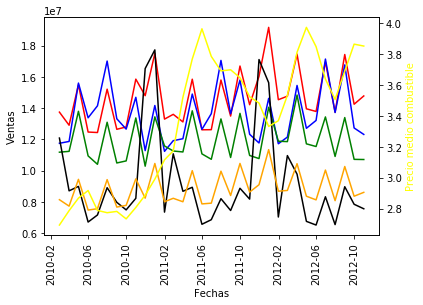

In [37]:
sales_complete_by_dpto_and_date = clean_walmart_dataset[["Dept", "Date_Formatted", "Weekly_Sales"]].groupby(["Dept", "Date_Formatted"]).sum()
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
fig, ax1 = plt.subplots()
_= plt.xticks(rotation=90)
red_dpto_patch = mpatches.Patch(color='red', label='Depto 92')
blue_dpto_patch = mpatches.Patch(color='blue', label='Depto 95')
green_dpto_patch = mpatches.Patch(color='green', label='Depto 38')
black_dpto_patch = mpatches.Patch(color='black', label='Depto 72')
orange_dpto_patch = mpatches.Patch(color='orange', label='Depto 90')
yellow_dpto_patch = mpatches.Patch(color='yellow', label='Precio del combustible')
ax1.set_xlabel('Fechas')
ax1.set_ylabel('Ventas')
dpto92 = plt.plot(sales_by_dpto_and_date.loc[92].resample('M').sum(), color="red")
dpto95 = plt.plot(sales_by_dpto_and_date.loc[95].resample('M').sum(), color="blue")
dpto38 = plt.plot(sales_by_dpto_and_date.loc[38].resample('M').sum(), color="green")
dpto72 = plt.plot(sales_by_dpto_and_date.loc[72].resample('M').sum(), color="black")
dpto90 = plt.plot(sales_by_dpto_and_date.loc[90].resample('M').sum(), color="orange")
ax2 = ax1.twinx()
ax2.set_ylabel('Precio medio combustible', color='yellow')
ax2.tick_params('y', colors='black')
mean_fuel_price = ax2.plot(mean_fuelprice_by_date.resample('M').mean(), color="yellow")

In [ ]:
import seaborn as sns


<h1>Fase IV. Modelado</h1>

<h1>Fase V. Evaluación</h1>

<h1>Fase VI. Despliegue</h1>